In [1]:
import collections
import datetime
import json
import math
import importlib
import dataclasses

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pull_request

In [2]:
def mean(values):
    return sum(values) / len(values)

def median(values):
    return sorted(values)[len(values) // 2]

def variance(values):
    mean_ = mean(values)
    sum_of_squares = sum([(value - mean_) ** 2 for value in values])
    return (sum_of_squares / len(values)) ** 0.5

def was_merged(pull_request):
    if "merged_at" in pull_request:
        return pull_request["merged_at"] is not None
    if "merged" in pull_request:
        return pull_request["merged"]
    return False

In [3]:
with open('data/pull-requests-detailed.json') as pull_requests_file:
    pull_requests = json.load(pull_requests_file)
    pull_requests = [pr for pr in pull_requests if 'message' not in pr]

In [4]:
importlib.reload(pull_request)
df = pd.DataFrame(pull_request.PullRequest.deserialize(pr) for pr in pull_requests if was_merged(pr))
df.merged_at = pd.to_datetime(df.merged_at)
df.set_index('merged_at', inplace=True)

In [5]:
df.dtypes

additions                         int64
author_login                     object
body                             object
changed_files                     int64
closed_at                datetime64[ns]
comments                          int64
commits                           int64
created_at               datetime64[ns]
deletions                         int64
id                                int64
maintainer_can_modify              bool
merged                             bool
merged_by_login                  object
number                            int64
open_duration                     int64
review_comments                   int64
state                            object
title                            object
updated_at               datetime64[ns]
dtype: object

/Users/christianscott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


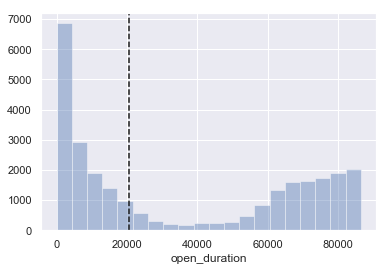

In [6]:
sns.distplot(df['open_duration'], kde=False);
plt.axvline(median(df['open_duration']), color="k", linestyle="--");

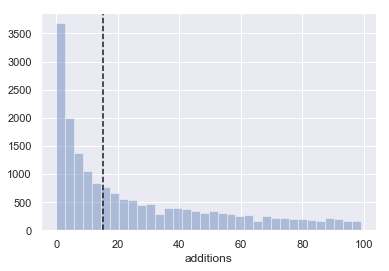

In [7]:
not_enormous_pr = df.additions < 100

sns.distplot(df[not_enormous_pr]['additions'], kde=False);
plt.axvline(median(df[not_enormous_pr]['additions']), color="k", linestyle="--");

/Users/christianscott/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


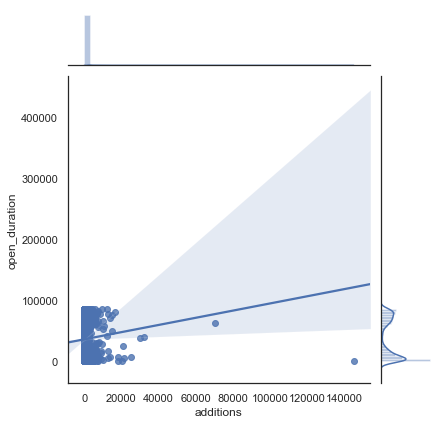

In [24]:
with sns.axes_style('white'):
    not_merged_by_author = df.merged_by_login != df.author_login
    g = sns.jointplot("additions", "open_duration", data=df, kind="reg")

In [15]:
counts = collections.defaultdict(int)
for pr in filter(was_merged, pull_requests):
    pr = pull_request.PullRequest.deserialize(pr)
    counts[pr["author_login"]] += 1

In [33]:
max(
    (pull_request.PullRequest.deserialize(pr) for pr in pull_requests if was_merged(pr)),
    key=lambda pr: pr["open_duration"]
)

{'id': 227784947,
 'number': 32323,
 'state': 'closed',
 'created_at': datetime.datetime(2018, 11, 1, 22, 58, 20),
 'updated_at': datetime.datetime(2018, 11, 6, 22, 58, 23),
 'closed_at': datetime.datetime(2018, 11, 6, 22, 58, 19),
 'merged_at': datetime.datetime(2018, 11, 6, 22, 58, 19),
 'open_duration': 86399,
 'title': 'Add tshirt to publish options',
 'body': '',
 'author_login': 'JadeGiacoppo',
 'merged_by_login': 'JadeGiacoppo',
 'merged': True,
 'comments': 13,
 'review_comments': 10,
 'maintainer_can_modify': False,
 'commits': 14,
 'additions': 449,
 'deletions': 3,
 'changed_files': 34}